In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import torch
import os, sys
from collections import Counter
from sklearn.metrics import mean_absolute_error
from verstack.stratified_continuous_split import scsplit
import re, string
from verstack.stratified_continuous_split import scsplit
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist 
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.losses import BinaryCrossentropy
from nltk.tokenize import word_tokenize
from collections import Counter
from keras_preprocessing.text import Tokenizer
import tensorflow as tf

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ALike\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ALike\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ALike\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ALike\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('step1_output.csv')
df.drop('Unnamed: 0', axis=1).head(7)

,favorite_count,tweet_id,text,in_reply_to_status_id_str,in_reply_to_user_id_str,in_reply_to_screen_name,is_quote_status,country_code,possibly_sensitive,quoted_status_id_str,...,tweet_created_at_week_day,user_created_at_minute,user_created_at_hour,user_created_at_months,user_created_at_year,user_created_at_day,user_created_at_week_day,hashtag_count,urls_count,user_mentions_count
0,0,1351757593035698176,More contagious UK coronavirus variant detecte...,NaN,NaN,NaN,0,111,False,NaN,...,1,55,17,7,2012,31,1,0,1,0
1,0,1351757459166285824,"Biden leads observance of America's 400,000 CO...",NaN,NaN,NaN,0,111,False,NaN,...,1,23,15,11,2020,7,1,0,1,0
2,0,1351757551814258688,WORKING smoke alarms save lives! Check yours ...,NaN,NaN,NaN,1,111,False,1.351601e+18,...,1,9,13,3,2014,10,1,0,1,0
3,0,1351757476123668480,24 million total U.S. Covid-19 infections were...,1.351555e+18,126031155.0,MillikenReports,0,111,NaN,NaN,...,1,31,16,3,2010,24,1,0,1,0
4,0,1351757647461150722,SIR Simulation of COVID-19 Pandemic in Malaysi...,NaN,NaN,NaN,0,111,False,NaN,...,1,44,8,6,2009,13,1,0,1,0
5,0,1351757544566489088,"Expect changes to gatherings, personal service...",NaN,NaN,NaN,0,111,False,NaN,...,1,40,15,4,2009,3,1,0,1,0
6,0,1351757454745300993,Did alagari try out all the Pesticides manufac...,NaN,NaN,NaN,1,111,False,1.351757e+18,...,1,24,7,10,2009,20,1,0,1,0


In [3]:
df.columns

Index(['Unnamed: 0', 'favorite_count', 'tweet_id', 'text',
       'in_reply_to_status_id_str', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'is_quote_status', 'country_code',
       'possibly_sensitive', 'quoted_status_id_str', 'retweet_count',
       'user_id', 'name', 'screen_name', 'location', 'description', 'verified',
       'followers_count', 'friends_count', 'listed_count', 'favourites_count',
       'statuses_count', 'default_profile', 'default_profile_image',
       'tweet_created_at_minute', 'tweet_created_at_hour',
       'tweet_created_at_day', 'tweet_created_at_week_day',
       'user_created_at_minute', 'user_created_at_hour',
       'user_created_at_months', 'user_created_at_year', 'user_created_at_day',
       'user_created_at_week_day', 'hashtag_count', 'urls_count',
       'user_mentions_count'],
      dtype='object')

In [4]:
sorted_csv = df.sort_values(by=["retweet_count"], ascending=False)
pd.set_option("max_columns", 50)
sorted_csv.head(4)

,Unnamed: 0,favorite_count,tweet_id,text,in_reply_to_status_id_str,in_reply_to_user_id_str,in_reply_to_screen_name,is_quote_status,country_code,possibly_sensitive,quoted_status_id_str,retweet_count,user_id,name,screen_name,location,description,verified,followers_count,friends_count,listed_count,favourites_count,statuses_count,default_profile,default_profile_image,tweet_created_at_minute,tweet_created_at_hour,tweet_created_at_day,tweet_created_at_week_day,user_created_at_minute,user_created_at_hour,user_created_at_months,user_created_at_year,user_created_at_day,user_created_at_week_day,hashtag_count,urls_count,user_mentions_count
151199,151199,80043,1352055632896077830,While President Biden was attending ceremonies...,NaN,NaN,NaN,0,111,NaN,NaN,21188,114566034,Dan O'Donnell,DanODonnellShow,"Milwaukee, WI","Host of The Dan O'Donnell Show, weekdays 9-11 ...",1,25569,1075,287,2583,23627,1,0,49,0,21,0,16,21,2,2010,15,0,0,1,0
121484,121484,52526,1351994015177125895,BREAKING: Over 100 people have died so far tod...,NaN,NaN,NaN,0,111,NaN,NaN,13011,441268645,Jeremy Kappell,JeremyKappell,USA,"Follower of God, seeker of truth ❤ Family man,...",1,14167,3688,107,19164,40518,0,0,44,20,20,1,38,22,12,2011,19,1,0,1,0
33566,33566,46552,1351844909372895232,President-elect Joe Biden plans to sign 17 ex...,NaN,NaN,NaN,0,111,NaN,NaN,9445,89887215,Yamiche Alcindor,Yamiche,"Washington, DC",Anchor & Moderator of @WashingtonWeek on @PBS....,1,1271171,7821,9174,7194,41112,0,0,51,10,20,1,37,6,11,2009,14,1,0,1,0
161997,161997,73207,1352086017822650368,"Today, @POTUS issued a mask mandate on federal...",NaN,NaN,NaN,0,111,False,NaN,8814,1323730225067339784,The White House,WhiteHouse,United States of America,Welcome to the Biden-Harris White House! Tweet...,1,6114283,5,9391,0,2360,1,0,50,2,21,0,55,20,11,2020,3,0,0,1,0


In [5]:
data_DF = df[['retweet_count', 'text']]
print(data_DF.shape)
data_DF.head(10)

(172414, 2)


,retweet_count,text
0,0,More contagious UK coronavirus variant detecte...
1,0,"Biden leads observance of America's 400,000 CO..."
2,1,WORKING smoke alarms save lives! Check yours ...
3,0,24 million total U.S. Covid-19 infections were...
4,0,SIR Simulation of COVID-19 Pandemic in Malaysi...
5,0,"Expect changes to gatherings, personal service..."
6,0,Did alagari try out all the Pesticides manufac...
7,0,Harambe would have never let COVID-19 happen.
8,0,"When things feel uneasy in your life, refocus ..."
9,0,ICYMI: This hospital has been called Ontario’s...


In [6]:
# Shuffle the Dataset.
shuffled_train = data_DF.sample(frac=1, random_state=4)

# Put all the samples where they dont have zeros re-tweet in a separate dataset.
non_zero_retweet = shuffled_train.loc[shuffled_train['retweet_count'] != 0]
nbr_samples = non_zero_retweet.shape[0] // 2

#Randomly select samples observations from the zero re-tweet (majority class)
zero_retweet = shuffled_train.loc[shuffled_train['retweet_count'] == 0].sample(n=nbr_samples, random_state=42)

print("Shape of non_zero_retweet: ", non_zero_retweet[:nbr_samples].shape)
print("Shape of zero_retweet: ", zero_retweet.shape)

# Concatenate both dataframes again
train_data = pd.concat([non_zero_retweet[:nbr_samples], zero_retweet])
#train_data_new = non_zero_retweet
print("Normalized train dataset: ", train_data.shape)


# train_data = data_DF

Shape of non_zero_retweet:  (22431, 2)
Shape of zero_retweet:  (22431, 2)
Normalized train dataset:  (44862, 2)


In [7]:
train_data_label = train_data.merge(train_data.retweet_count
                 .apply(lambda s: pd.Series({'target': 1 if s != 0 else 0})), left_index=True, right_index=True)

In [8]:
train_data_label[train_data_label.retweet_count == 0]

,retweet_count,text,target
134254,0,@MasksukOfficial I wear my mask to protect oth...,0
127795,0,Home Schooling: How To Help Your Kids Succeed ...,0
72922,0,It is decidedly odd to leave out the efforts o...,0
160639,0,"I had to work today, COVID-19 testing, treatin...",0
74046,0,The 7 themes of ‘Leaders in Lockdown’. A tell ...,0
...,...,...,...
60602,0,Telangana healthcare worker dies hours after g...,0
120267,0,@OkThoMag NEW VIDEO: Viral Covid-19 Firefighte...,0
131634,0,Tokyo struggles to stem flow of people as coro...,0
47244,0,#Caucasian_Knot COVID-19 epidemic amends memor...,0


In [9]:
tweet_length = 200
x_train = train_data_label.copy(deep='true')
print("Shape Training Tweet Data: " + str(x_train.shape))
print("Maximum Tweet length: {}".format(len(max((x_train.text), key=len))))
print("Minimum Tweet length: {}".format(len(min((x_train.text), key=len))))
result = [len(x) for x in x_train]
print("Mean Tweet length: {}".format(np.mean(result)))

Shape Training Tweet Data: (44862, 3)
Maximum Tweet length: 157
Minimum Tweet length: 8
Mean Tweet length: 7.666666666666667


In [10]:
# Some basic helper functions to clean text by removing urls, emojis, html tags and punctuations.
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

In [11]:
x_train['text'] = x_train['text'].apply(lambda x: remove_URL(x))
x_train['text'] = x_train['text'].apply(lambda x: remove_emoji(x))
x_train['text'] = x_train['text'].apply(lambda x: remove_html(x))
x_train['text'] = x_train['text'].apply(lambda x: remove_punct(x))
print(x_train.shape)
x_train.sample(5)

(44862, 3)


,retweet_count,text,target
167607,3,BreakingNews\nThe Cuban government will produc...,1
77513,0,CurateDurrant Hi friends\nThe following Corona...,0
79379,1,Alan explores the Effectuation Theory in relat...,1
34985,2,Great piece on how trainings and lifeskills se...,1
100198,0,New Covid19 cluster in Spore community cases u...,0


In [12]:
# tokenizing
x_train['tokenized'] = x_train['text'].apply(word_tokenize)
x_train.head()

,retweet_count,text,target,tokenized
108462,1,Watch this space social Management COVID19 imp...,1,"[Watch, this, space, social, Management, COVID..."
93481,1,NULOOKREFINISH I was 28 weeks and 5 days pregn...,1,"[NULOOKREFINISH, I, was, 28, weeks, and, 5, da..."
67732,1,Buccaneers Activate LB Kevin Minter From COVID...,1,"[Buccaneers, Activate, LB, Kevin, Minter, From..."
120237,1,Exclusive WHO plans slew of COVID19 vaccine ap...,1,"[Exclusive, WHO, plans, slew, of, COVID19, vac..."
103322,1,JoeBiden Congratulations Mr President I am ve...,1,"[JoeBiden, Congratulations, Mr, President, I, ..."


In [13]:
#lower case
x_train['lower'] = x_train['tokenized'].apply(lambda x: [word.lower() for word in x])
x_train.head()

,retweet_count,text,target,tokenized,lower
108462,1,Watch this space social Management COVID19 imp...,1,"[Watch, this, space, social, Management, COVID...","[watch, this, space, social, management, covid..."
93481,1,NULOOKREFINISH I was 28 weeks and 5 days pregn...,1,"[NULOOKREFINISH, I, was, 28, weeks, and, 5, da...","[nulookrefinish, i, was, 28, weeks, and, 5, da..."
67732,1,Buccaneers Activate LB Kevin Minter From COVID...,1,"[Buccaneers, Activate, LB, Kevin, Minter, From...","[buccaneers, activate, lb, kevin, minter, from..."
120237,1,Exclusive WHO plans slew of COVID19 vaccine ap...,1,"[Exclusive, WHO, plans, slew, of, COVID19, vac...","[exclusive, who, plans, slew, of, covid19, vac..."
103322,1,JoeBiden Congratulations Mr President I am ve...,1,"[JoeBiden, Congratulations, Mr, President, I, ...","[joebiden, congratulations, mr, president, i, ..."


In [14]:
#removing stopwords
stop = set(stopwords.words('english'))
x_train['stopwords_removed'] = x_train['lower'].apply(lambda x: [word for word in x if word not in stop])
x_train.head()

,retweet_count,text,target,tokenized,lower,stopwords_removed
108462,1,Watch this space social Management COVID19 imp...,1,"[Watch, this, space, social, Management, COVID...","[watch, this, space, social, management, covid...","[watch, space, social, management, covid19, im..."
93481,1,NULOOKREFINISH I was 28 weeks and 5 days pregn...,1,"[NULOOKREFINISH, I, was, 28, weeks, and, 5, da...","[nulookrefinish, i, was, 28, weeks, and, 5, da...","[nulookrefinish, 28, weeks, 5, days, pregnant,..."
67732,1,Buccaneers Activate LB Kevin Minter From COVID...,1,"[Buccaneers, Activate, LB, Kevin, Minter, From...","[buccaneers, activate, lb, kevin, minter, from...","[buccaneers, activate, lb, kevin, minter, covi..."
120237,1,Exclusive WHO plans slew of COVID19 vaccine ap...,1,"[Exclusive, WHO, plans, slew, of, COVID19, vac...","[exclusive, who, plans, slew, of, covid19, vac...","[exclusive, plans, slew, covid19, vaccine, app..."
103322,1,JoeBiden Congratulations Mr President I am ve...,1,"[JoeBiden, Congratulations, Mr, President, I, ...","[joebiden, congratulations, mr, president, i, ...","[joebiden, congratulations, mr, president, exc..."


In [15]:
x_train['pos_tags'] = x_train['stopwords_removed'].apply(nltk.tag.pos_tag)
x_train.head()

,retweet_count,text,target,tokenized,lower,stopwords_removed,pos_tags
108462,1,Watch this space social Management COVID19 imp...,1,"[Watch, this, space, social, Management, COVID...","[watch, this, space, social, management, covid...","[watch, space, social, management, covid19, im...","[(watch, NN), (space, NN), (social, JJ), (mana..."
93481,1,NULOOKREFINISH I was 28 weeks and 5 days pregn...,1,"[NULOOKREFINISH, I, was, 28, weeks, and, 5, da...","[nulookrefinish, i, was, 28, weeks, and, 5, da...","[nulookrefinish, 28, weeks, 5, days, pregnant,...","[(nulookrefinish, JJ), (28, CD), (weeks, NNS),..."
67732,1,Buccaneers Activate LB Kevin Minter From COVID...,1,"[Buccaneers, Activate, LB, Kevin, Minter, From...","[buccaneers, activate, lb, kevin, minter, from...","[buccaneers, activate, lb, kevin, minter, covi...","[(buccaneers, NNS), (activate, VBP), (lb, JJ),..."
120237,1,Exclusive WHO plans slew of COVID19 vaccine ap...,1,"[Exclusive, WHO, plans, slew, of, COVID19, vac...","[exclusive, who, plans, slew, of, covid19, vac...","[exclusive, plans, slew, covid19, vaccine, app...","[(exclusive, JJ), (plans, NNS), (slew, VBP), (..."
103322,1,JoeBiden Congratulations Mr President I am ve...,1,"[JoeBiden, Congratulations, Mr, President, I, ...","[joebiden, congratulations, mr, president, i, ...","[joebiden, congratulations, mr, president, exc...","[(joebiden, JJ), (congratulations, NNS), (mr, ..."


In [16]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
x_train['wordnet_pos'] = x_train['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
x_train.head()

,retweet_count,text,target,tokenized,lower,stopwords_removed,pos_tags,wordnet_pos
108462,1,Watch this space social Management COVID19 imp...,1,"[Watch, this, space, social, Management, COVID...","[watch, this, space, social, management, covid...","[watch, space, social, management, covid19, im...","[(watch, NN), (space, NN), (social, JJ), (mana...","[(watch, n), (space, n), (social, a), (managem..."
93481,1,NULOOKREFINISH I was 28 weeks and 5 days pregn...,1,"[NULOOKREFINISH, I, was, 28, weeks, and, 5, da...","[nulookrefinish, i, was, 28, weeks, and, 5, da...","[nulookrefinish, 28, weeks, 5, days, pregnant,...","[(nulookrefinish, JJ), (28, CD), (weeks, NNS),...","[(nulookrefinish, a), (28, n), (weeks, n), (5,..."
67732,1,Buccaneers Activate LB Kevin Minter From COVID...,1,"[Buccaneers, Activate, LB, Kevin, Minter, From...","[buccaneers, activate, lb, kevin, minter, from...","[buccaneers, activate, lb, kevin, minter, covi...","[(buccaneers, NNS), (activate, VBP), (lb, JJ),...","[(buccaneers, n), (activate, v), (lb, a), (kev..."
120237,1,Exclusive WHO plans slew of COVID19 vaccine ap...,1,"[Exclusive, WHO, plans, slew, of, COVID19, vac...","[exclusive, who, plans, slew, of, covid19, vac...","[exclusive, plans, slew, covid19, vaccine, app...","[(exclusive, JJ), (plans, NNS), (slew, VBP), (...","[(exclusive, a), (plans, n), (slew, v), (covid..."
103322,1,JoeBiden Congratulations Mr President I am ve...,1,"[JoeBiden, Congratulations, Mr, President, I, ...","[joebiden, congratulations, mr, president, i, ...","[joebiden, congratulations, mr, president, exc...","[(joebiden, JJ), (congratulations, NNS), (mr, ...","[(joebiden, a), (congratulations, n), (mr, v),..."


In [17]:
# Applying word lemmatizer.
wnl = WordNetLemmatizer()
x_train['lemmatized'] = x_train['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
x_train['lemmatized'] = x_train['lemmatized'].apply(lambda x: [word for word in x if word not in stop])
x_train['lemma_str'] = [' '.join(map(str, l)) for l in x_train['lemmatized']]
x_train.head()

,retweet_count,text,target,tokenized,lower,stopwords_removed,pos_tags,wordnet_pos,lemmatized,lemma_str
108462,1,Watch this space social Management COVID19 imp...,1,"[Watch, this, space, social, Management, COVID...","[watch, this, space, social, management, covid...","[watch, space, social, management, covid19, im...","[(watch, NN), (space, NN), (social, JJ), (mana...","[(watch, n), (space, n), (social, a), (managem...","[watch, space, social, management, covid19, im...",watch space social management covid19 impact i...
93481,1,NULOOKREFINISH I was 28 weeks and 5 days pregn...,1,"[NULOOKREFINISH, I, was, 28, weeks, and, 5, da...","[nulookrefinish, i, was, 28, weeks, and, 5, da...","[nulookrefinish, 28, weeks, 5, days, pregnant,...","[(nulookrefinish, JJ), (28, CD), (weeks, NNS),...","[(nulookrefinish, a), (28, n), (weeks, n), (5,...","[nulookrefinish, 28, week, 5, day, pregnant, r...",nulookrefinish 28 week 5 day pregnant receive ...
67732,1,Buccaneers Activate LB Kevin Minter From COVID...,1,"[Buccaneers, Activate, LB, Kevin, Minter, From...","[buccaneers, activate, lb, kevin, minter, from...","[buccaneers, activate, lb, kevin, minter, covi...","[(buccaneers, NNS), (activate, VBP), (lb, JJ),...","[(buccaneers, n), (activate, v), (lb, a), (kev...","[buccaneer, activate, lb, kevin, minter, covid...",buccaneer activate lb kevin minter covid19 list
120237,1,Exclusive WHO plans slew of COVID19 vaccine ap...,1,"[Exclusive, WHO, plans, slew, of, COVID19, vac...","[exclusive, who, plans, slew, of, covid19, vac...","[exclusive, plans, slew, covid19, vaccine, app...","[(exclusive, JJ), (plans, NNS), (slew, VBP), (...","[(exclusive, a), (plans, n), (slew, v), (covid...","[exclusive, plan, slew, covid19, vaccine, appr...",exclusive plan slew covid19 vaccine approval g...
103322,1,JoeBiden Congratulations Mr President I am ve...,1,"[JoeBiden, Congratulations, Mr, President, I, ...","[joebiden, congratulations, mr, president, i, ...","[joebiden, congratulations, mr, president, exc...","[(joebiden, JJ), (congratulations, NNS), (mr, ...","[(joebiden, a), (congratulations, n), (mr, v),...","[joebiden, congratulation, mr, president, exci...",joebiden congratulation mr president excite se...


In [18]:
print(len(max(x_train.stopwords_removed, key=len)))

24


In [19]:
x_train_final = x_train[["retweet_count", "lemma_str"]]
x_train_final.head()

,retweet_count,lemma_str
108462,1,watch space social management covid19 impact i...
93481,1,nulookrefinish 28 week 5 day pregnant receive ...
67732,1,buccaneer activate lb kevin minter covid19 list
120237,1,exclusive plan slew covid19 vaccine approval g...
103322,1,joebiden congratulation mr president excite se...


In [20]:
def counter_word(text_r):
    count = Counter()
    for i in text_r:
        for word_r in i.split():
            count[word_r] += 1
    return count

In [21]:
text = x_train_final["lemma_str"]
counter = counter_word(text)
num_words = len(counter)
num_words

50868

In [22]:
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(x_train_final["lemma_str"])

In [23]:
word_index = tokenizer.word_index
word_index

{'covid19': 1,
 'coronavirus': 2,
 'vaccine': 3,
 '’': 4,
 'new': 5,
 'case': 6,
 'death': 7,
 'people': 8,
 'get': 9,
 'pandemic': 10,
 'u': 11,
 'test': 12,
 'say': 13,
 'biden': 14,
 'today': 15,
 'health': 16,
 'day': 17,
 'report': 18,
 'first': 19,
 'one': 20,
 'covid': 21,
 'uk': 22,
 'go': 23,
 'president': 24,
 'trump': 25,
 'vaccination': 26,
 'take': 27,
 'need': 28,
 'news': 29,
 'work': 30,
 'state': 31,
 '“': 32,
 'help': 33,
 'time': 34,
 'update': 35,
 'year': 36,
 'die': 37,
 'make': 38,
 'government': 39,
 'know': 40,
 'like': 41,
 'see': 42,
 'number': 43,
 'via': 44,
 'country': 45,
 'due': 46,
 'variant': 47,
 'virus': 48,
 'world': 49,
 'county': 50,
 'mask': 51,
 'positive': 52,
 'live': 53,
 'good': 54,
 'last': 55,
 'many': 56,
 'look': 57,
 'still': 58,
 'joe': 59,
 '2021': 60,
 'public': 61,
 'january': 62,
 'high': 63,
 'receive': 64,
 'call': 65,
 'wednesday': 66,
 'home': 67,
 'week': 68,
 'could': 69,
 'well': 70,
 '”': 71,
 'record': 72,
 'please': 73,
 

In [24]:
len(word_index)

50868

In [25]:
x_train_final = x_train_final.sample(frac=1)
train_tweets = tokenizer.texts_to_sequences(x_train_final["lemma_str"])
train_tweets_lbl = x_train_final["retweet_count"]
train_tweets[0]

[9438, 7921, 1694, 819, 1]

In [26]:
tweet_length = 100
x_train = x_train_final.copy(deep='true')
print("Shape Training Tweet Data: " + str(x_train.shape))
print("Maximum Tweet length: {}".format(len(max((x_train_final.lemma_str), key=len))))
print("Minimum Tweet length: {}".format(len(min((x_train_final.lemma_str), key=len))))
result = [len(x) for x in x_train_final]
print("Mean Tweet length: {}".format(np.mean(result)))

Shape Training Tweet Data: (44862, 2)
Maximum Tweet length: 127
Minimum Tweet length: 0
Mean Tweet length: 11.0


In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_length = 10 #words
train_padded = pad_sequences(train_tweets, maxlen=max_length, padding='post', truncating='post')

In [28]:
train_padded[0]

array([9438, 7921, 1694,  819,    1,    0,    0,    0,    0,    0])

In [29]:
print(x_train_final["lemma_str"])
print(len(x_train_final["lemma_str"]))
print(train_padded[0])

13902                    sania mirza reveals suffer covid19
126760    eligible canada recovery sickness benefit crsb...
152015    population elephant famous unique association ...
17285     sagar473 xhnews first covid19 start earlier u ...
87308     long lockdown lockdown2021 lockdown3 covid19uk...
                                ...                        
35039     please exercise safely exercise alone one pers...
152086    covid19 pittsburgh allegheny co health dept sa...
67488     maryamrajavi coronavirus mullah ’ strong ally ...
32915     covid19 coronavirussa welcomehometrevornoah co...
29378     start soon stay home stay safe follow market c...
Name: lemma_str, Length: 44862, dtype: object
44862
[9438 7921 1694  819    1    0    0    0    0    0]


In [30]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_text(text):
  return "  ".join([reverse_word_index.get(i, "?") for i in text])

In [31]:
decode_text(train_tweets[0])

'sania  mirza  reveals  suffer  covid19'

In [32]:
train_tweets_lbl[train_tweets_lbl > 0] = 1
print(train_tweets_lbl.unique())
train_padded[10]

[0 1]


array([ 275, 4702, 1052, 2358,  236, 2064,    0,    0,    0,    0])

In [33]:
# pd.DataFrame(train_tweets_lbl).groupby()

In [34]:
train_padded.shape

(44862, 10)

In [35]:
from sklearn.model_selection import train_test_split
x_train_LR, x_test_LR, y_train_LR, y_test_LR = train_test_split(train_padded, train_tweets_lbl, test_size=0.15, random_state=0)

# Train a LSTM network

In [36]:

from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
# Model configuration
additional_metrics = ['accuracy']
batch_size = 128
embedding_output_dims = 15
loss_function = BinaryCrossentropy()
max_sequence_length = max_length
num_distinct_words = num_words
number_of_epochs = 15
optimizer = Adam()
validation_split = 0.20
verbosity_mode = 1

# Disable eager execution
tf.compat.v1.disable_eager_execution()

In [37]:
# Define the Keras model
model = Sequential()
model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
model.add(LSTM(10))
model.add(Dense(1, activation='sigmoid'))

In [38]:
# Compile the model
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

# Give a summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 15)            763020    
_________________________________________________________________
lstm (LSTM)                  (None, 10)                1040      
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 764,071
Trainable params: 764,071
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Train the model
history = model.fit(x_train_LR, y_train_LR, batch_size=batch_size, epochs=number_of_epochs, verbose=verbosity_mode, validation_split=validation_split)

Train on 30505 samples, validate on 7627 samples
Epoch 1/15
30505/30505 [==============================] - 8s 273us/sample - loss: 0.6734 - accuracy: 0.5853 - val_loss: 0.6570 - val_accuracy: 0.6141
Epoch 2/15
30505/30505 [==============================] - 6s 197us/sample - loss: 0.5901 - accuracy: 0.6953 - val_loss: 0.6762 - val_accuracy: 0.6080
Epoch 3/15
30505/30505 [==============================] - 6s 198us/sample - loss: 0.4769 - accuracy: 0.7746 - val_loss: 0.7479 - val_accuracy: 0.5929
Epoch 4/15
30505/30505 [==============================] - 6s 187us/sample - loss: 0.3894 - accuracy: 0.8234 - val_loss: 0.8309 - val_accuracy: 0.5943
Epoch 5/15
30505/30505 [==============================] - 6s 200us/sample - loss: 0.3301 - accuracy: 0.8504 - val_loss: 0.9062 - val_accuracy: 0.5831
Epoch 6/15
30505/30505 [==============================] - 6s 203us/sample - loss: 0.2863 - accuracy: 0.8718 - val_loss: 0.9889 - val_accuracy: 0.5816
Epoch 7/15
30505/30505 [===========================

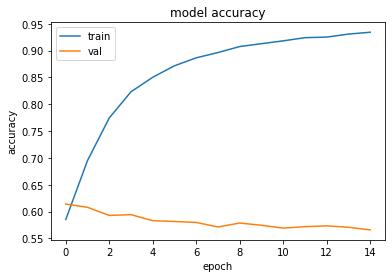

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [49]:
# Test the model after training
print(y_test_LR.shape)
test_results = model.evaluate(x_test_LR, y_test_LR, verbose=False)
print(len(test_results))
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

(6730,)
2
Test results - Loss: 0.43519029633251377 - Accuracy: 57.86032676696777%


In [50]:
predictions = model.predict(x_test_LR)
predictions

array([[0.1408749 ],
       [0.79625905],
       [0.16042082],
       ...,
       [0.30959463],
       [0.00859801],
       [0.64340734]], dtype=float32)

In [51]:
predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0

In [52]:
np.unique(predictions)

array([0., 1.], dtype=float32)

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [54]:
cm = metrics.confusion_matrix(y_test_LR, predictions)
print(cm)

[[2004 1325]
 [1511 1890]]


NameError: name 'score' is not defined

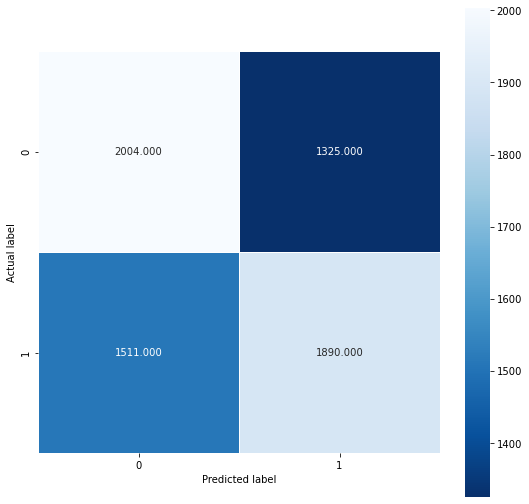

In [55]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);